 <div class="alert alert-block alert-danger">
**Note to markers**
The data was taken from Kaggle but has been heavily cleaned and doctored so that the linear regression shows a a weak correlation. 

## Data Scientist Demographics

*'What does a does a Data Scientist look like?'*, *'What is Data Science exactly?'*, *'Is Python or R better to learn for beginners?'*, *'Do you have to have a degree in Computer Science to be a Data Scientist?'* and *'Do data scientists earn as much as I think?'*.

Anjul Bhambri, the Vice Preseident of big data prodcts at IBM says this 

>*‘A data scientist is somebody who is inquisitive, who can stare at data and spot trends. It’s almost like a Renaissance individual who really wants to learn and bring change to an organisation.’*

**The Data**

Kaggle is the home of analytics and predictive modelling competitions. Data Science enthusiast, beginners to professionals, compete to create the best predictive models using datasets uploaded both by individuals and companies looking for insights. Prizes can be as high as $3 million US. In late 2017 a survey of Kaggle users was conducted and received over 16,700 responses. The dataset was, of course, made public and many insights have emerged since. We have taken a portion of the data set and heavily modified the data. Both to clean the data, a significant component of data science and to ensure original assignment submission.

**The Files**

- *multipleChoiceResponses.csv * : Participants' answers to multiple choice questions. Each column contains the answers of one respondent to a specific question.                         
- *conversionRates.csv* : Currency conversion rates to USD. 

 <div class="alert alert-block alert-info">
** Your Information** 
Enter your information in the following cell. Please make sure you specify what version of python you are using as your tutor may not be using the same version and will adjust your code accordingly.  

# Table of contents

* [1. Demographic analysis](#demographics)
   * [1.1. Age](#age)
   * [1.2. Gender](#gender)
   * [1.3. Country](#country)
* [2. Education](#education)
    * [2.1. Formal education](#formal)
    * [2.2. Degree major](#major)
* [3. Employment](#employment)
    * [3.1. Employment Status](#status)
    * [3.2. Job Title](#title)
    * [3.3. Favoured language](#language)
* [4. Salary](#salary)
    * [4.1. Salary overview](#overview)
    * [4.2. Salary by country](#countrysal)
    * [4.3. Salary and gender](#gender_salary)
    * [4.4. Salary and formal education](#education_salary)
* [5. Predicting Salary](#pred)


## 0. Load your libraries and files
<a id="Load data"></a>
***


 <div class="alert alert-block alert-info">
1. ** Load your libraries and files** 

This assesment will be conducted using pandas. You will also be required to create visualisations. We recomend Seaborn which is more visually appealing than matplotlib. However, you may choose either. For further information on Seaborn visit https://seaborn.pydata.org/

*Hint: Remember to comment what each library does.* 

In [1]:
# Your code
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualisation 
%matplotlib inline
import seaborn as sns # Visualisation
sns.set(color_codes=True) 
from scipy.stats import linregress # Linear regression

In [2]:
# Your code
rates=pd.read_csv('conversionRates.csv')
data = pd.read_csv('multipleChoiceResponses.csv')

In [3]:
data.head()

,GenderSelect,Country,Age,EmploymentStatus,CurrentJobTitleSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,CompensationAmount,CompensationCurrency,Unnamed: 10
0,Male,Argentina,26,Employed full-time,Business Analyst,SQL,Bachelor's degree,Other,18000.0,ARS,NaN
1,Male,Argentina,25,Employed full-time,Computer Scientist,Python,Bachelor's degree,Computer Science,24000.0,ARS,NaN
2,Male,Argentina,24,Employed full-time,Machine Learning Engineer,Python,Bachelor's degree,Computer Science,247000.0,ARS,NaN
3,Male,Argentina,25,Employed full-time,Machine Learning Engineer,Python,Bachelor's degree,"Information technology, networking, or system ...",546000.0,ARS,NaN
4,Female,Australia,37,Employed part-time,Data Analyst,SQL,Bachelor's degree,Other,55000.0,AUD,NaN


## 1. Demographic Analysis
<a id="demographics"></a>
***
##### So what does a data scientist look like?

Let's get a general understanding of the characteristics of the survey participants. Demographic overviews are a standard way to start an exploration of survey data. The types of participants can heavily affect the survey responses.

### 1.1 Age
<a id="age"></a>
Visualisation is a quick and easy way to gain an overview of the data. One method is through a boxplot. Boxplots are a way to show the distribution of numerical data and display the five descriptive statistics: minimum, first quartile, median, third quartile, and maximum. Outliers should also be shown.

 <div class="alert alert-block alert-info">
2 Create a box plot showing the age of all the participants.

Your plot must have labels for each axis, a title, numerical points for the age axis and also show the outliers. 

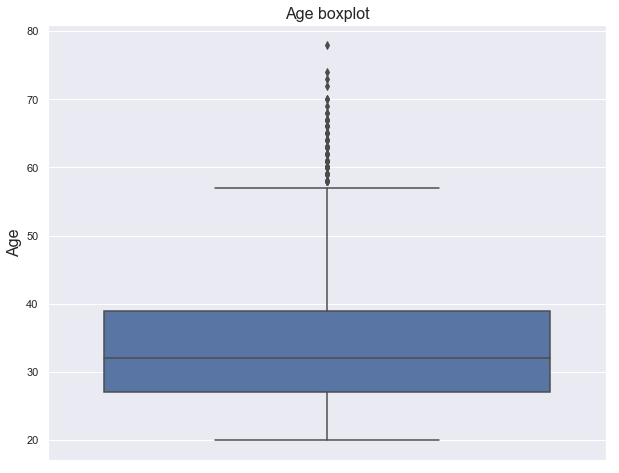

In [4]:
# Your code
plt.figure(figsize=(10,8))
sns.boxplot( y=data['Age'],data=data)
plt.title('Age boxplot', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.show();

 <div class="alert alert-block alert-warning">
3. Calculate the five descriptive statistics as shown on the boxplot, as well as the mean

Round your answer to the nearest whole number.

In [5]:
# Your code
data['Age'].describe()

count    3540.000000
mean       34.371469
std         9.458981
min        20.000000
25%        27.000000
50%        32.000000
75%        39.000000
max        78.000000
Name: Age, dtype: float64

<span style="color: green">**Answer**</span>

Mean: 34

Minimum: 20

Lower Quartile (25%): 27

Median (50%): 32

Upper Quartile (75%): 39

Maximum: 78


 <div class="alert alert-block alert-warning">
4. Looking at the boxplot what general conclusion can you make about the age of the participants?

You must explain your answer concerning the median, minimum and maximum age of the respondents. You must also make mention of the outliers if there are any. 


<span style="color: green">**Answer**</span>

The age median is about 32 years old with the youngest being 20 and the oldest 78. There are also a few outliers aged between 58 and 78.

 <div class="alert alert-block alert-warning">
5. Regardless of the errors that the data show, we are interested in working-age data scientists, aged between 18 and 65.  

How many respondents were under 18 or over 65?

In [8]:
# Your code
youngOlds = data[(data.Age <18)|(data.Age>65)]
print (len(youngOlds))

19


<span style="color: green">**Answer**</span>

19

### 1.2 Gender
<a id="gender"></a>
We are interested in the gender of respondents. Within the STEM fields, there are more males than females or other genders. In 2016 the Office of the chief scientist found that women held only 25% of jobs in STEM. Let's see how data science compares. 

 <div class="alert alert-block alert-info">

6. Plot the gender distribution of survey participants.

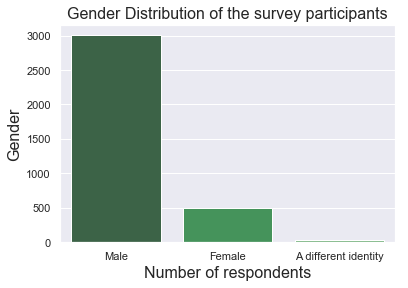

In [8]:
# Your code
sns.countplot(x="GenderSelect", data=data, palette="Greens_d");
plt.title("Gender Distribution of the survey participants", fontsize=16)
plt.xlabel("Number of respondents", fontsize=16)
plt.ylabel("Gender", fontsize=16)
plt.show();

 <div class="alert alert-block alert-danger">
**The following output is also acceptable** 

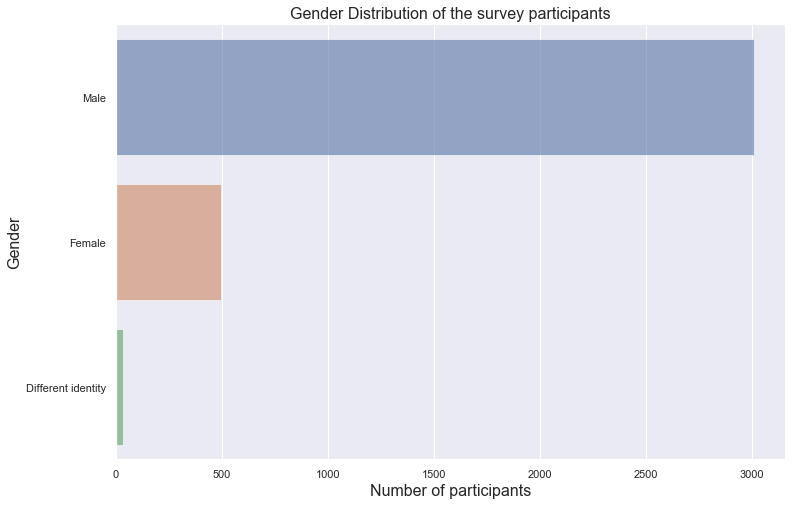

In [9]:
# Alternative code
plt.figure(figsize=(12,8))
genders = data['GenderSelect'].value_counts()
sns.barplot(y=genders.index, x=genders.values, alpha=0.6)
plt.yticks(range(len(data['GenderSelect'].value_counts().index)), ['Male', 'Female','Different identity'])
plt.title("Gender Distribution of the survey participants", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("Gender", fontsize=16)
plt.show();

 <div class="alert alert-block alert-warning">

7. What percentage of respondants were men? What percentage of respondants were women?

In [10]:
# Your code
print('Percentage of men: {:0.2f}% '.format(100*len(data[data['GenderSelect']=='Male'])/len(data['GenderSelect'])))
print('Percentage of women: {:0.2f}% '.format(100*len(data[data['GenderSelect']=='Female'])/len(data['GenderSelect'])))

Percentage of men: 84.97% 
Percentage of women: 14.01% 


<span style="color: green">**Answer**</span>

Percentage of men: 84.97% 

Percentage of women: 14.01% 

 <div class="alert alert-block alert-info">
8. Let's see if there is any relationship between age and gender.

Create a box plot showing the age of all the participants according to gender.

Include the response 'Different identity' in your plot.

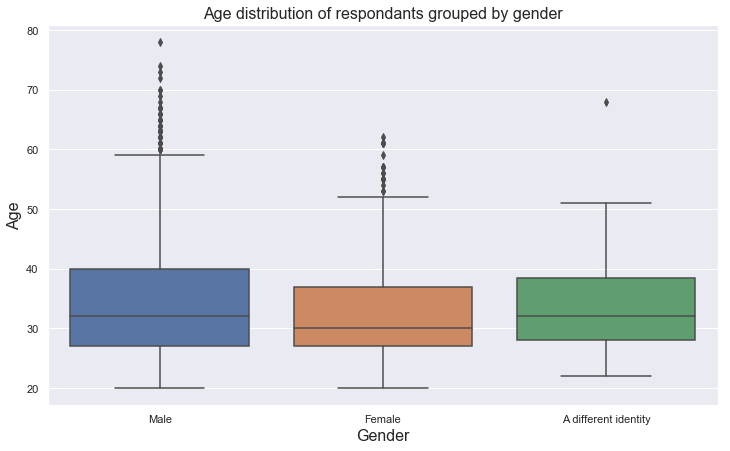

In [11]:
# Your code
plt.figure(figsize = (12,7))
sns.boxplot( x = 'GenderSelect', y = 'Age', data = data)
plt.title("Age distribution of respondants grouped by gender", fontsize=16)
plt.xlabel("Gender", fontsize=16)
plt.ylabel("Age", fontsize=16)
plt.show();

 <div class="alert alert-block alert-warning">

9. What comments can you make about the relationship between the age and gender of the respondents?

Hint: You need to determine the numeric descriptive statistics

In [12]:
data.groupby(['GenderSelect']).describe()

Age                                               \
                       count       mean       std   min   25%   50%   75%   
GenderSelect                                                                
A different identity    36.0  34.666667  9.844505  22.0  28.0  32.0  38.5   
Female                 496.0  32.735887  8.659951  20.0  27.0  30.0  37.0   
Male                  3008.0  34.637633  9.555902  20.0  27.0  32.0  40.0   

                           CompensationAmount               ...            \
                       max              count          mean ...       75%   
GenderSelect                                                ...             
A different identity  68.0               36.0  1.681214e+07 ...  242250.0   
Female                62.0              496.0  1.269841e+06 ...  160000.0   
Male                  78.0             3008.0  3.283755e+06 ...  300000.0   

                                  Unnamed: 10                               
                              max       count mean std min 25% 50% 75% max  
GenderSelect                                                                
A different identity  530000000.0         0.0  NaN NaN NaN NaN NaN NaN NaN  
Female                240000000.0         0.0  NaN NaN NaN NaN NaN NaN NaN  
Male                  800000000.0         0.0  NaN NaN NaN NaN NaN NaN NaN  

[3 rows x 24 columns]

<span style="color: green">**Answer**</span>

The youngest men and women to respond were 20.For those with a different identity it was 36. The median age for men  and those with a different identity was 32 and women were slightly younger at 30. The maximum age for men was 78, 62 for those with a different identity and for women 62. 

### 1.3 Country
<a id="country"></a>
We know that people practise data science all over the world. The United States is thought of as a 'hub' of commercial data science as well as research followed by the United Kingdom and Germany. 

Because the field is evolving so quickly, it may be that these perceptions, formed in the late 2000s are now inaccurate. So let's find out where data scientists live.

 <div class="alert alert-block alert-info">
10. Create a bar graph of the respondants according to which country they are from.

Find the percentage of respondants from the top 5 countries


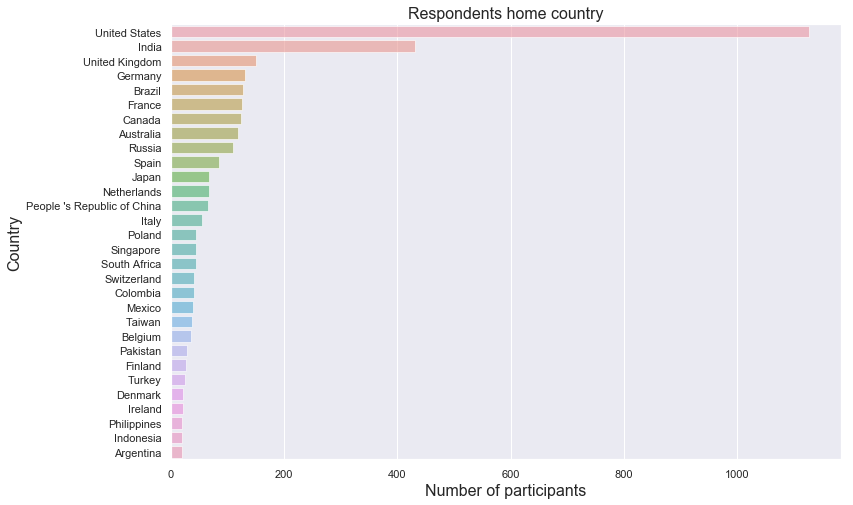

In [13]:
# Your code
plt.figure(figsize=(12,8))
countries = data['Country'].value_counts().head(30)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.title("Respondents home country", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("Country", fontsize=16)
plt.show();

In [14]:
# Your code
print('Percentage from United States: {:0.2f}% '.format(100*len(data[data['Country']=='United States'])
                                                        /len(data['Country'])))
print('Percentage from India: {:0.2f}% '.format(100*len(data[data['Country']=='India'])
                                                        /len(data['Country'])))
print('Percentage from United Kingdom: {:0.2f}% '.format(100*len(data[data['Country']=='United Kingdom'])
                                                        /len(data['Country'])))
print('Percentage from Germany: {:0.2f}% '.format(100*len(data[data['Country']=='Germany'])
                                                        /len(data['Country'])))
print('Percentage from Brazil: {:0.2f}% '.format(100*len(data[data['Country']=='Brazil'])
                                                        /len(data['Country'])))

Percentage from United States: 31.81% 
Percentage from India: 12.18% 
Percentage from United Kingdom: 4.27% 
Percentage from Germany: 3.67% 
Percentage from Brazil: 3.59% 


<span style="color: green">**Answer**</span>

Percentage from United States: 31.81% 

Percentage from India: 12.18% 

Percentage from United Kingdom: 4.27% 

Percentage from Germany: 3.67% 

Percentage from Brazil: 3.59% 

 <div class="alert alert-block alert-warning">

11. What comments can you make about our previous comments on the United States, United Kingdom and Europe?

Are the majority of data scientists now likely to come from those countries?


<span style="color: green">**Answer**</span>

The United States is still the most likely country for data scientists to reside. However, India is now the second most common followed by the United Kingdom and Germany.

 <div class="alert alert-block alert-info">
12. Now that we have another demographic variable, let's see if there is any relationship between country, age and gender. We are specifically interested in the United States, India, United Kingdom, Germany and of course Australia!


Write code to output the mean and median age for each gender for United States, India, United Kingdom, Germany and Australia.

Hint: You may need to create a copy or slice.

In [15]:
# Your Code
US = data[data['Country']== 'United States']
US.groupby(['GenderSelect']).agg({'Age':['median','mean','count']})  

Age                 
                     median       mean count
GenderSelect                                
A different identity     43  38.727273    11
Female                   31  34.370892   213
Male                     34  36.906874   902

In [16]:
Ind = data[data['Country']== 'India']
Ind.groupby(['GenderSelect']).agg({'Age':['median','mean','count']}) 

Age                 
                     median       mean count
GenderSelect                                
A different identity     22  22.000000     1
Female                   28  29.061224    49
Male                     28  29.553806   381

In [17]:
UK = data[data['Country']== 'United Kingdom']
UK.groupby(['GenderSelect']).agg({'Age':['median','mean','count']}) 

Age                 
                     median       mean count
GenderSelect                                
A different identity     36  36.000000     2
Female                   33  33.636364    22
Male                     33  35.811024   127

In [18]:
Ger = data[data['Country']== 'Germany']
Ger.groupby(['GenderSelect']).agg({'Age':['median','mean','count']}) 

Age                 
             median       mean count
GenderSelect                        
Female           29  31.428571    14
Male             34  36.629310   116

In [19]:
Aus = data[data['Country']== 'Australia']
Aus.groupby(['GenderSelect']).agg({'Age':['median','mean','count']}) 

Age                 
             median       mean count
GenderSelect                        
Female           34  35.000000    18
Male             36  37.158416   101

 <div class="alert alert-block alert-warning">

13. What Pattern do you notice about the relationship between age, gender for each of these countries?


<span style="color: green">**Answer**</span>

The mean and median age for women in all these countries is lower than the mens.

## 2. Education
<a id="education"></a>
***
So far we have seen that there may be some relationships between age, gender and the country that the respondents are from.  Next, we should look at what their education is like. 

### 2.1 Formal education
<a id="formal"></a>

We saw in a recent activity that a significant number of job advertisements call for a masters degree or a PhD. Let's see if this is a reasonable ask based on the respondent's formal education. 

 <div class="alert alert-block alert-info">
 14. Plot and display as text output the number and percentage of respondents with each type of formal education.

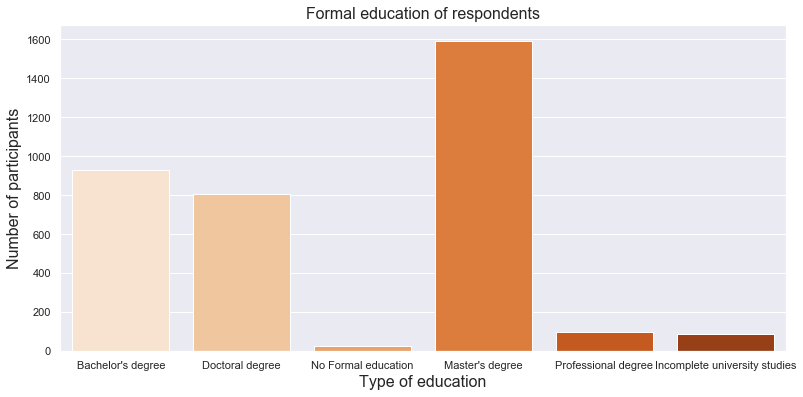

In [20]:
# Your code
plt.figure(figsize=(13,6))
sns.countplot(x="FormalEducation", data=data, palette="Oranges");
plt.title("Formal education of respondents", fontsize=16)
plt.ylabel("Number of participants", fontsize=16)
plt.xlabel("Type of education", fontsize=16)
plt.show();

In [21]:
#Your code
data['FormalEducation'].value_counts()

Master's degree                  1594
Bachelor's degree                 930
Doctoral degree                   808
Professional degree                96
Incomplete university studies      87
No Formal education                25
Name: FormalEducation, dtype: int64

In [22]:
# Your code
edu = data['FormalEducation'].value_counts()
((edu / edu.sum())*100)


Master's degree                  45.028249
Bachelor's degree                26.271186
Doctoral degree                  22.824859
Professional degree               2.711864
Incomplete university studies     2.457627
No Formal education               0.706215
Name: FormalEducation, dtype: float64

 <div class="alert alert-block alert-warning">

15. Based on what you have seen, do you think that a Master's or Doctoral degree is too unrealistic for job advertisers looking for someone with data science skills?

Give your reasons.

<span style="color: green">**Answer**</span>

The large majority of respondants have either a Master's or Doctoral degree. This is not unrealistic. 

 <div class="alert alert-block alert-info">
16. Let's see if the trend is reflected in the Australian respondents.

Plot and display as text output the number and percentage of Australian respondents with each type of formal education.

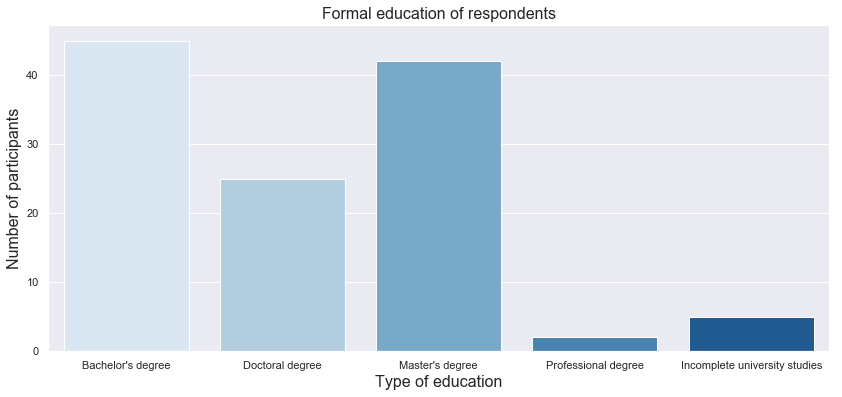

In [23]:

# Your code
AusEd = data[data['Country']== 'Australia']

plt.figure(figsize=(14,6))
sns.countplot(x="FormalEducation", data=AusEd, palette="Blues");
plt.title("Formal education of respondents", fontsize=16)
plt.ylabel("Number of participants", fontsize=16)
plt.xlabel("Type of education", fontsize=16)
plt.show();

In [24]:
AusEd['FormalEducation'].value_counts().head(30)

Bachelor's degree                45
Master's degree                  42
Doctoral degree                  25
Incomplete university studies     5
Professional degree               2
Name: FormalEducation, dtype: int64

In [25]:
#Your code
eduLevel = AusEd['FormalEducation'].value_counts().head(30)
((eduLevel / eduLevel.sum())*100)


Bachelor's degree                37.815126
Master's degree                  35.294118
Doctoral degree                  21.008403
Incomplete university studies     4.201681
Professional degree               1.680672
Name: FormalEducation, dtype: float64

 <div class="alert alert-block alert-info">

17. Display as text output the mean and median age of each respondant according to each degree type.



In [26]:
# Your code
data.groupby(['FormalEducation']).agg({'Age':['median','mean']}) 

Age           
                              median       mean
FormalEducation                                
Bachelor's degree               28.0  30.632258
Doctoral degree                 37.0  39.235149
Incomplete university studies   35.0  36.011494
Master's degree                 31.0  33.746550
No Formal education             42.0  41.680000
Professional degree             34.5  36.645833

## 3. Employment
<a id="employment"></a>
***
After you complete your degree many of you will be seeking work. The graduate employment four months after graduation in Australia is 69.5%. At Monash, it is 70.1%. This is for all Australian degrees. Let's have a look at the state of the employment market for the respondents. 

Let's have a look at the data. 


### 3.1 Employment status
<a id="employment"></a>
The type of employment will affect the salary of a worker. Those employed part-time will likely earn less than those who work full time. 

 <div class="alert alert-block alert-info">

18. Plot the type of employment the respondents have on a bar char.



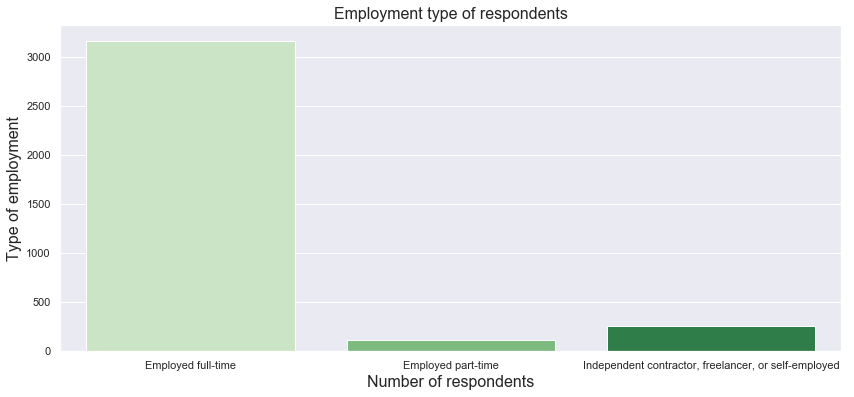

In [27]:
# Your code
plt.figure(figsize=(14,6))
sns.countplot(x="EmploymentStatus", data=data, palette="Greens");
plt.title("Employment type of respondents", fontsize=16)
plt.xlabel("Number of respondents", fontsize=16)
plt.ylabel("Type of employment", fontsize=16)
plt.show();

 <div class="alert alert-block alert-info">

19. You may be wondering if your own degree and experince will help you gain full time employment after you graduate. 

Plot the respondants employment types against their degrees.



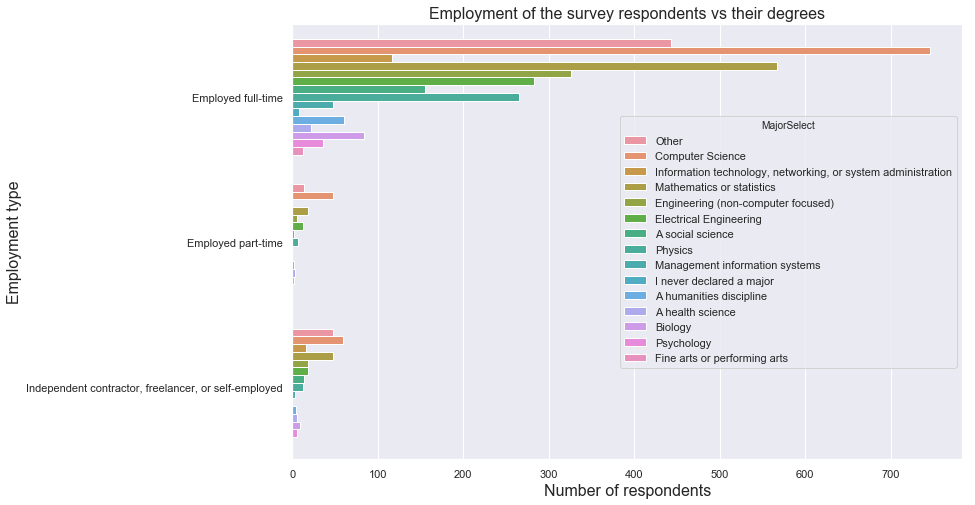

In [28]:
# Your code
plt.figure(figsize=(12,8))
sns.countplot(y="EmploymentStatus", hue="MajorSelect", data=data);
plt.title("Employment of the survey respondents vs their degrees", fontsize=16)
plt.xlabel("Number of respondents", fontsize=16)
plt.ylabel("Employment type", fontsize=16)
plt.show();

 <div class="alert alert-block alert-warning">
20. Looking at the graph, which degree is best to gain full-time employment?

What is odd about IT, networking or system administration??

Explain your answers.

<span style="color: green">**Answer**</span>

The best degree to gain full-time employment is computer science.

IT, networking or system administration is odd because there appear to be no part-time respondents. 

 <div class="alert alert-block alert-info">

21. Overall, we know that 92.71% of respondents are employed, and 89.55% are employed full time. This may not be the same for every country. 
Print out the percentages of all respondents who are employed full time in Australia, United Kingdom and the United States.

In [29]:
# Your code
AusEmploy = data[data['Country']== 'Australia']
print('{:0.2f}% of the instances are employed full-time'.format(100*len(AusEmploy[AusEmploy['EmploymentStatus']=='Employed full-time'])/len(AusEmploy)))


84.87% of the instances are employed full-time


In [30]:
# Your code
UKEmploy = data[data['Country']== 'United Kingdom']
print('{:0.2f}% of the instances are employed full-time'.format(100*len(UKEmploy[UKEmploy['EmploymentStatus']=='Employed full-time'])/len(UKEmploy)))


90.73% of the instances are employed full-time


In [31]:
# Your code
USEmploy = data[data['Country']== 'United States']
print('{:0.2f}% of the instances are employed full-time'.format(100*len(USEmploy[USEmploy['EmploymentStatus']=='Employed full-time'])/len(USEmploy)))

91.47% of the instances are employed full-time


Remember earlier we saw that age seemed to have some interesting characteristics when plotted with other variables. 

Let's find out the median age of employees by type of employment. 

 <div class="alert alert-block alert-info">
22. Plot a boxplot of the respondents age grouped by employment type.

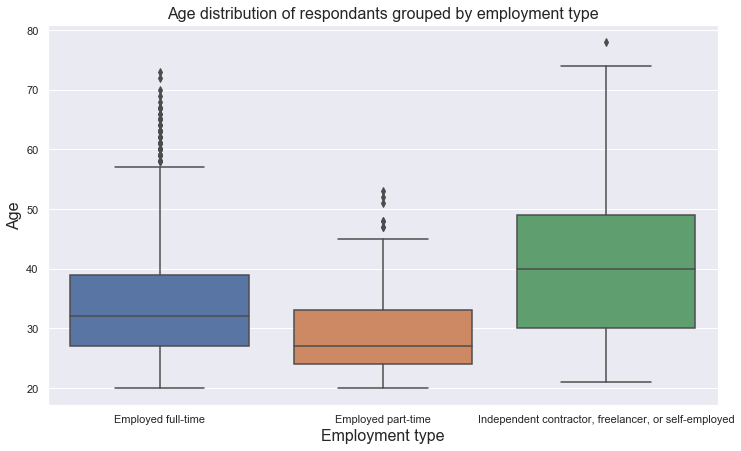

In [32]:
# Your code
plt.figure(figsize = (12,7))
sns.boxplot( x = 'EmploymentStatus', y = 'Age', data = data)
plt.title("Age distribution of respondants grouped by employment type", fontsize=16)
plt.xlabel("Employment type", fontsize=16)
plt.ylabel("Age", fontsize=16)
plt.show();

Now this is interesting, full time employees seem to be a little older than part time employees. Independent contactors, freelancers and self-employed respondents are older still. 

## 4. Salary
<a id="salary"></a>

Data science is considered a very well paying role and was named 'best job of the year' for 2016. 

We had a look around and saw that data scientists were paid between $110,823 at IBM and 149,963 at Apple, in Australian dollars. 

On average it seems that $116,840 is what an Australian Data scientist can expect to earn. Do you think this is reasonable? Is this any different to the rest of the world? 

### 4.1 Salary overview
<a id="overview"></a>
Since all of the respondents did not come from one country, we can assume that they gave their salaries in their countries currency. We have filtered the data for you and provided exchange rates in a file called *conversionRates.csv* which should already be imported. 

Let's have a look at the data. 

 <div class="alert alert-block alert-info">
23. Use the codes for each country to merge the files so that you can convert the salary data to Australian Dollars (AUD). Print out the maximum and median salary in AUD. Hint: think about what data type you have.

In [33]:
# Your code
salary =data.copy()
salary=salary.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
salary['Salary']=pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRateAUS']

In [34]:
# Your code
salary['Salary'] = pd.to_numeric(salary['Salary'], errors='coerce')
print('Maximum Salary is AUD $',salary['Salary'].dropna().astype(int).max())
print('Median Salary is AUD $',salary['Salary'].dropna().astype(int).median())

Maximum Salary is AUD $ 790290
Median Salary is AUD $ 76998.0


 <div class="alert alert-block alert-warning">
24. Do those figures reflect the values at the beginning of this section? Why do you think so?


<span style="color: green">**Answer**</span>

No, they are far lower. This may be because we are calculating the salaries for a range of professions, not just data scientists. Also this is for all countries, not just Australia. 

### 4.2 Salary by country
<a id="countrysal"></a>

Since each country has different cost of living and pay indexes, we should see how they compare.

<div class="alert alert-block alert-info">
25. Plot a boxplot of the Australian respondents salary distribution. Print out the maximum and median salaries for Australian repsondnts.

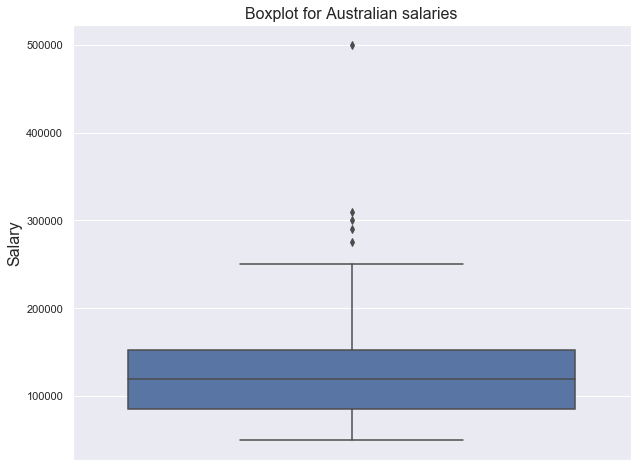

In [35]:
# Your code
AusSal =salary[salary['Country']== 'Australia']
plt.figure(figsize=(10,8))
sns.boxplot( y=AusSal['Salary'],data=AusSal)
plt.title("Boxplot for Australian salaries", fontsize=16)
plt.ylabel('Salary', fontsize=16)
plt.show();

In [36]:
# Your code
AusSal['Salary'] = pd.to_numeric(AusSal['Salary'], errors='coerce')
print('Maximum Salary is AUD $',AusSal['Salary'].dropna().astype(int).max())
print('Median Salary is AUD $',AusSal['Salary'].dropna().astype(int).median())

Maximum Salary is AUD $ 500000
Median Salary is AUD $ 120000.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


 <div class="alert alert-block alert-warning">
26. Do those figures for Australia reflect the values at the beginning of this section?


<span style="color: green">**Answer**</span>

Yes they do. 

<div class="alert alert-block alert-info">
27. Australia's salaries look pretty good.

Plot the salaries of all countries on a bar chart.

Hint: Adjust for full-time employees only

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


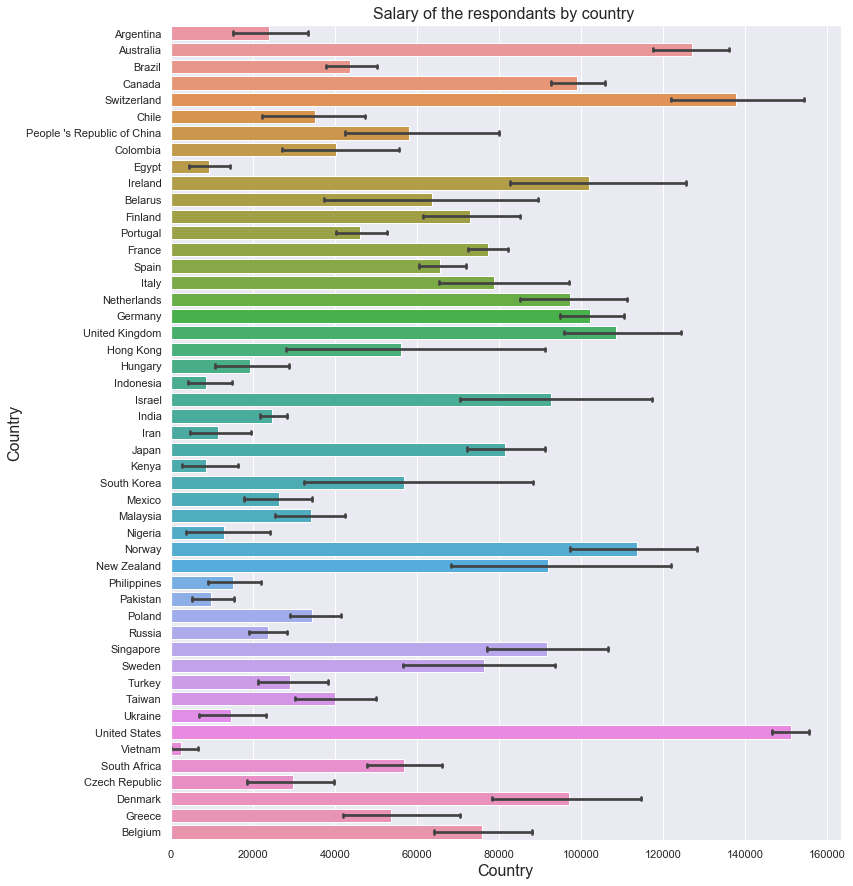

In [37]:
# Your code
EmpSal =salary[salary['EmploymentStatus']== 'Employed full-time']
plt.figure(figsize=(12,15))
sns.barplot(x="Salary", y="Country", data=EmpSal, capsize=.2)
plt.title("Salary of the respondants by country ", fontsize=16)
plt.xlabel("Country", fontsize=16)
plt.ylabel("Country", fontsize=16)
plt.show();

 <div class="alert alert-block alert-warning">
28. What do you notice about the distributions? What do you think is the cause of this?


<span style="color: green">**Answer**</span>

Countries such as Vietnam, Kenya, Indonesia, Pakistan, Nigeria and Iran have very low salaries compared to respondents from the United States, Norway, United Kingdom, Switzerland and Australia. 

This may be because of the differences in the purchasing parity e.g. cost of living and inflation. Most of these contries are developing and have been affected by war in recent years. 

### 4.3 Salary and Gender
<a id="gender_salary"></a>
The gender pay gap in the tech industry is a big talking point. Let's see if the respondents are noticing the effect.

<div class="alert alert-block alert-info">


29. Plot the salaries of all countries grouped by gender on a boxplot.


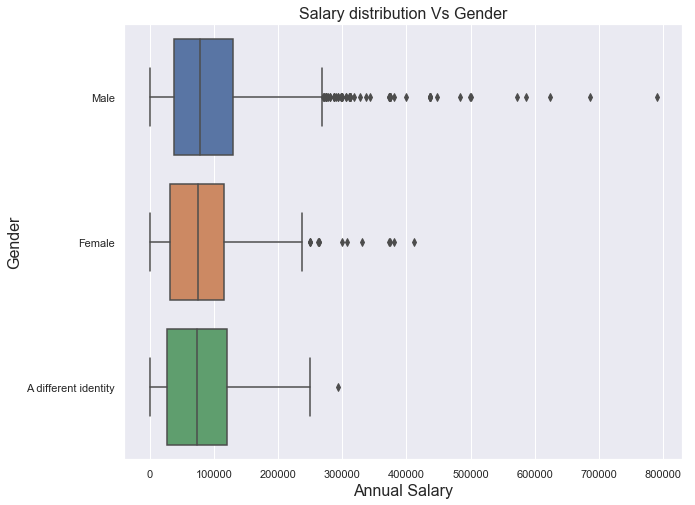

In [38]:
# Your code
plt.subplots(figsize=(10,8))
sns.boxplot(y='GenderSelect',x='Salary',data=salary)
plt.title("Salary distribution Vs Gender", fontsize=16)
plt.ylabel("Gender", fontsize=16)
plt.xlabel("Annual Salary", fontsize=16)
plt.show();

 <div class="alert alert-block alert-warning">
30. What do you notice about the distributions?


<span style="color: green">**Answer**</span>

Women have slightly lower salaries than men, but men are far more likely to have a salary that extends up to $800,000.

<div class="alert alert-block alert-info">
31. The salaries may be affected by the country the responant is from. In Australia the weekly difference in pay between men and women is 17.7% and in the United states it is 26%.

Print the median salaries of Australia, United States and India grouped by gender.


In [39]:
# Your code
salary[salary['Country']== 'Australia'].groupby(['GenderSelect'])['Salary'].median()

GenderSelect
Female     82000.0
Male      130000.0
Name: Salary, dtype: float64

In [40]:
# Your code
salary[salary['Country']== 'United States'].groupby(['GenderSelect'])['Salary'].median()

GenderSelect
A different identity    168264.137295
Female                  112176.091530
Male                    143336.116955
Name: Salary, dtype: float64

In [41]:
# Your code
salary[salary['Country']== 'India'].groupby(['GenderSelect'])['Salary'].median()

GenderSelect
A different identity    13628.14880
Female                  12654.70960
Male                    17327.21776
Name: Salary, dtype: float64

### 4.4 Salary and formal education
<a id="education_salary"></a>

*Is getting your master's really worth it ?*
*Do PhDs get more money?*

Let's see.

<div class="alert alert-block alert-info">
32. Plot the salary distribution of all respondants and group by formal education type on a boxplot.


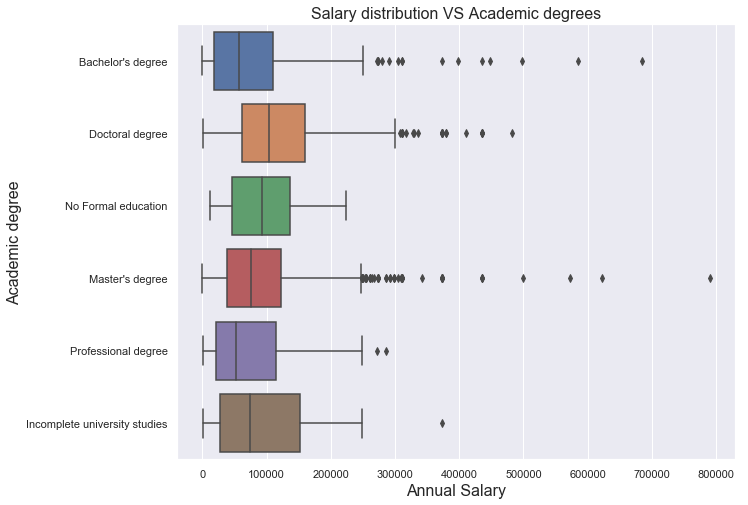

In [42]:
# Your code
titles=list(salary['FormalEducation'].value_counts().index)
temp=salary[salary.FormalEducation.isin(titles)]
plt.figure(figsize=(10,8))
sns.boxplot( x='Salary', y='FormalEducation',data=temp)
plt.title("Salary distribution VS Academic degrees", fontsize=16)
plt.xlabel("Annual Salary", fontsize=16)
plt.ylabel("Academic degree", fontsize=16)
plt.show();

 <div class="alert alert-block alert-warning">
33. Is it better to get your Masters or PhD? 

Explain your answer.

<span style="color: green">**Answer**</span>
PhDs earn more than master's graduates, but the master's graduates are shown to extend far beyond the salary of the highest earning PhD. 

### 4.5 Salary and job
<a id="education_salary"></a>
So are data scientists the highest paid in the industry?  Or are there lesser known roles that are hiding from the spotlight?

<div class="alert alert-block alert-info">

34. Plot a bar chart of average salary (with error bars) of full time employees and group by job title.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


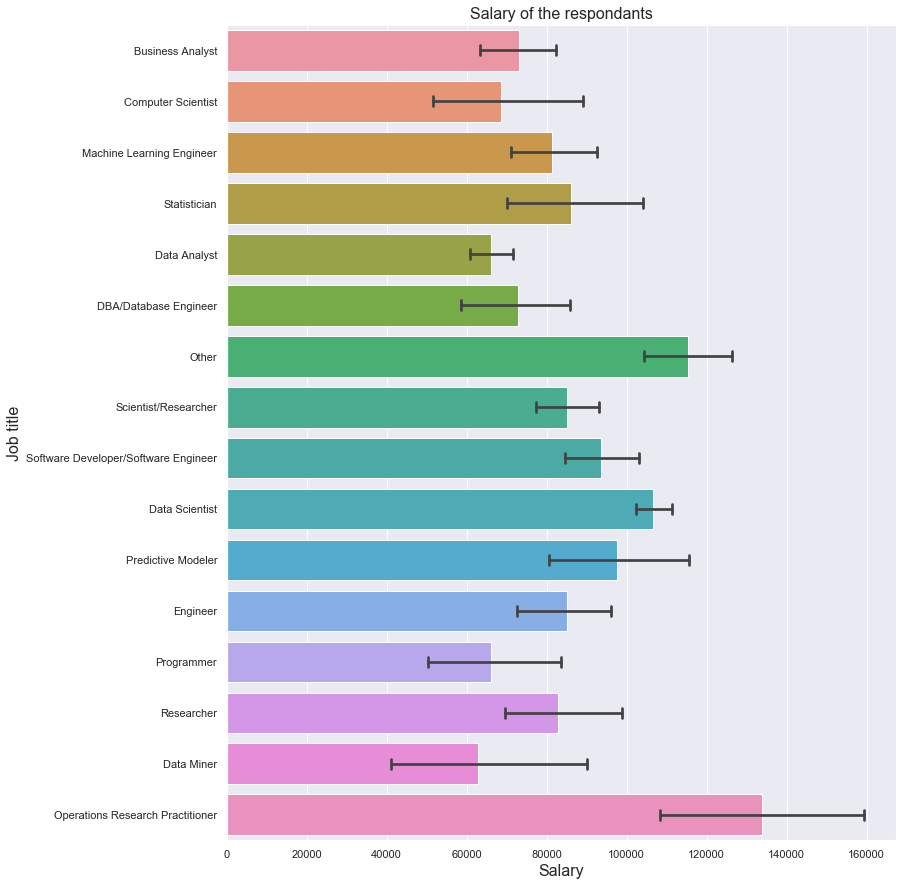

In [43]:
# Your code
EmpSal =salary[salary['EmploymentStatus']== 'Employed full-time']
plt.figure(figsize=(12,15))
sns.barplot(x="Salary", y="CurrentJobTitleSelect", data=EmpSal, capsize=.2)
plt.title("Salary of the respondants", fontsize=16)
plt.xlabel("Salary", fontsize=16)
plt.ylabel("Job title", fontsize=16)
plt.show();

 <div class="alert alert-block alert-warning">
35. Which job earns the most? Give a brief explaination of that job.


<span style="color: green">**Answer**</span>

Operations Research Practitioners provide decision support solutions to industry and generate theoretical findings for the advancement of the discipline. The OR practitioner can be a person who works in industry or an academic professional who works as a consultant. Regardless of where they are based, it is the responsibility of the OR practitioner to provide a solution to help improve a client's business operations. 

<div class="alert alert-block alert-info">
36. So why are data scientists in the spotlight? Plot the salary distribution of full-time employees and group by job title as boxplots.

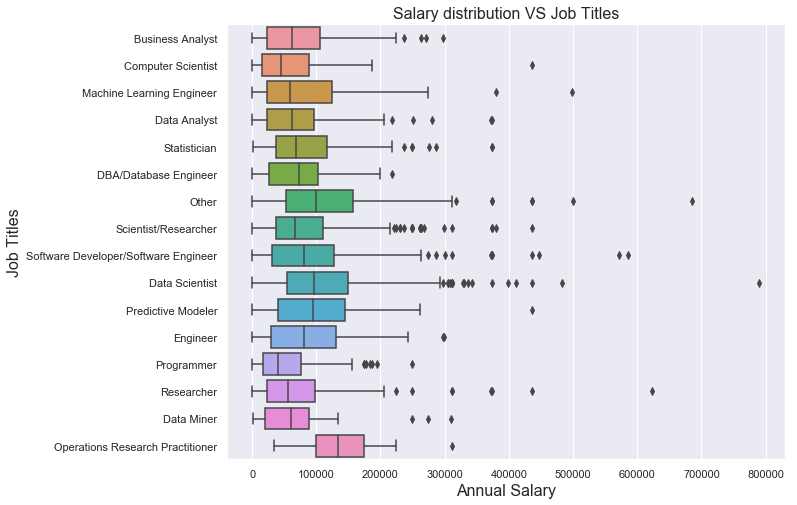

In [44]:
# Your code
titles=list(salary['CurrentJobTitleSelect'].value_counts().index)
temp=salary[salary.CurrentJobTitleSelect.isin(titles)]
plt.figure(figsize=(10,8))
sns.boxplot( x='Salary', y='CurrentJobTitleSelect',data=temp)
plt.title("Salary distribution VS Job Titles", fontsize=16)
plt.xlabel("Annual Salary", fontsize=16)
plt.ylabel("Job Titles", fontsize=16)
plt.show();

 <div class="alert alert-block alert-warning">
37. Do the boxplots give some insight into why data scientists may receive so much attention?

Explain your answer.

<span style="color: green">**Answer**</span>

Data scientists have a reasonable salary, but there is a large portion of them that have very large salaries. Compared to ORpractitions, there is a lower likelihood of achieving a salary beyond $200,000.

## 5. Predicting salary
<a id="pred"></a>

We have looked at many variables and seen that there are a lot of factors that could affect your salary.  

Let's say we wanted to reduce it though? One method we could use is a linear regression. This is a very basic model that can give us some insights. Note though, there are more robust ways to predict salary based on categorical variables. But this exercise will give you a taste of predictive modelling.

<div class="alert alert-block alert-info">
38. Plot the salary distribution and age of respondants on a scatterplot.

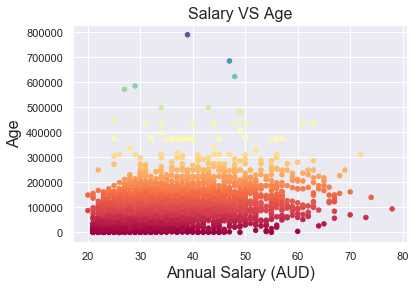

In [45]:
# Your code
points = plt.scatter(salary["Age"], salary["Salary"],
                     c=salary["Salary"], s=20, cmap="Spectral")
plt.title("Salary VS Age", fontsize=16)
plt.xlabel("Annual Salary (AUD)", fontsize=16)
plt.ylabel("Age", fontsize=16)
plt.show();

plt.show();

<div class="alert alert-block alert-info">

39. There may be a weak relationship. Let's refine this.

Create a linear regression between the salary and age of full-time Australian respondants. Plot the linear fit over the scatterplot.

In [46]:
#Your code
#Fit a Linear Regression
AusMoney = salary[(salary['EmploymentStatus']=='Employed full-time')&(salary['Country']=='Australia')].copy()
slope, intercept, r_value, p_value, std_err = linregress(AusMoney['Age'],AusMoney['Salary'])
line = [slope*xi + intercept for xi in AusMoney['Age']]

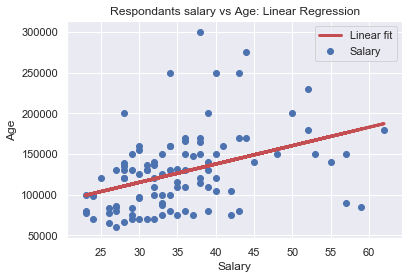

In [47]:
#Your code
# Plot fitted regression 
# (1 mark) for graph
plt.plot(AusMoney['Age'],line,'r-', linewidth=3, label = 'Linear fit') 
plt.scatter(AusMoney['Age'],AusMoney['Salary'])
plt.title('Respondants salary vs Age: Linear Regression')
plt.xlabel('Salary')
plt.ylabel('Age') 
plt.legend() # Optional
plt.show() 

 <div class="alert alert-block alert-warning">
40. Do You think that this is a good way to predict salaries?

Explain your answer.

<span style="color: green">**Answer**</span>

Although there is a weak linear relationship, there are too many outliers to confidently predict a salary from a respondents age. 